In [362]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [363]:
daily_stat = pd.read_csv('daily_stat.csv').dropna()
daily_stat

,date,Gas_sum,ext_temp_max,ext_temp_min,ext_temp_mean,ext_hum_max,ext_hum_min,ext_hum_mean,SH_temp_max,SH_temp_min,SH_temp_mean,SH_hum_max,SH_hum_min,SH_hum_mean,DWH_temp_max,DWH_temp_min,DWH_temp_mean,DWH_hum_max,DWH_hum_min,DWH_hum_mean
0,2020-03-08,3.390954,10.966667,5.633333,8.673611,85.666667,55.000000,72.694444,21.042422,19.675223,20.440088,21.042422,19.675223,20.440088,21.527065,18.830000,20.404865,54.471739,48.157083,49.943412
1,2020-03-09,4.457667,11.333333,6.400000,8.072917,89.333333,61.333333,76.048611,21.248277,18.627593,19.974721,21.248277,18.627593,19.974721,22.500000,17.166000,20.458280,77.400000,46.037115,52.373323
2,2020-03-10,3.381333,12.900000,8.366667,11.388194,90.000000,58.333333,73.388889,21.172666,19.627880,20.405663,21.172666,19.627880,20.405663,22.662600,17.957400,20.991088,59.439600,49.091200,52.729024
3,2020-03-11,4.357000,12.000000,6.000000,8.868056,77.000000,56.333333,69.111111,21.355782,19.286411,20.491250,21.355782,19.286411,20.491250,22.529808,19.076923,21.502654,57.177308,43.674200,48.275562
4,2020-03-12,4.533103,9.533333,4.033333,6.532639,78.666667,52.333333,62.819444,20.789682,18.819389,19.898139,20.789682,18.819389,19.898139,22.230556,18.543462,21.127058,48.535962,38.434400,40.883145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,2021-02-26,0.000000,11.566667,2.366667,6.561111,87.666667,52.666667,73.986111,22.151790,19.479551,20.999058,22.151790,19.479551,20.999058,22.002935,19.637159,21.046392,55.701739,49.655000,51.525701
356,2021-02-27,7.268000,11.800000,1.133333,6.433333,90.000000,50.666667,73.423611,21.800190,19.728652,20.961144,21.800190,19.728652,20.961144,22.151477,19.926739,20.722920,53.565500,47.776087,49.660282
357,2021-02-28,3.249333,11.466667,1.033333,6.178472,90.000000,51.666667,73.333333,21.854012,19.504637,20.723700,21.854012,19.504637,20.723700,22.558750,19.261087,20.896852,54.471522,47.411304,49.526565
358,2021-03-01,3.343667,11.466667,2.300000,5.593750,87.666667,52.333333,75.562500,21.984504,18.987746,20.554832,21.984504,18.987746,20.554832,22.187609,18.216087,20.925813,56.015652,47.803261,49.608494


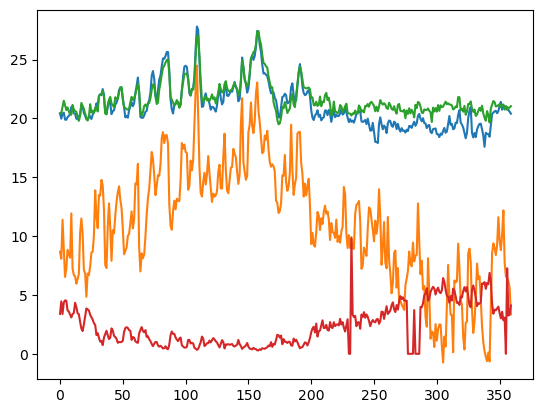

In [364]:
plt.plot(daily_stat['SH_temp_mean'])
plt.plot(daily_stat['ext_temp_mean'])
plt.plot(daily_stat['DWH_temp_mean'])

plt.plot(daily_stat['Gas_sum'])

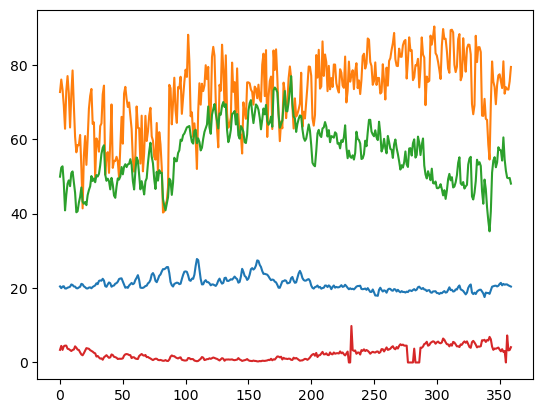

In [365]:
plt.plot(daily_stat['SH_hum_mean'])
plt.plot(daily_stat['ext_hum_mean'])
plt.plot(daily_stat['DWH_hum_mean'])

plt.plot(daily_stat['Gas_sum'])

In [366]:

# Define the function to classify periods
def classify_heating_period(row):
    if row['ext_temp_mean'] > 15:
        return 'DWH'
    else:
        return 'SH+DWH'


In [367]:

# Apply the function to create a new column
daily_stat['Heating_Period'] = daily_stat.apply(classify_heating_period, axis=1)

In [368]:
daily_stat['ext_temp_mean'].describe()

count    360.000000
mean      10.955729
std        5.023786
min       -0.736806
25%        7.631424
50%       11.098438
75%       14.464931
max       24.492361
Name: ext_temp_mean, dtype: float64

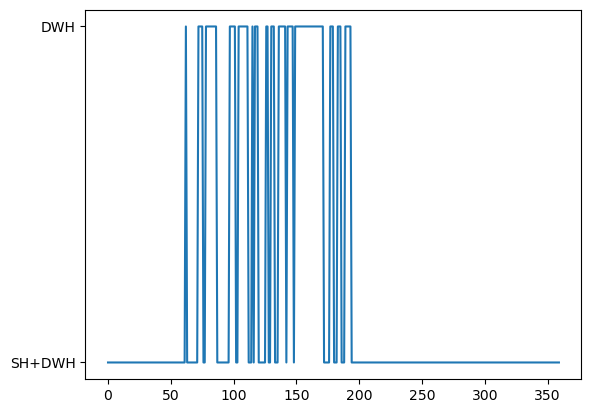

In [369]:
plt.plot(daily_stat['Heating_Period'])
plt.show()

In [370]:
daily_stat['DWH_temp_diff'] = daily_stat['DWH_temp_max'] - daily_stat['DWH_temp_min']
daily_stat['DWH_hum_diff'] = daily_stat['DWH_hum_max'] - daily_stat['DWH_hum_min']


In [371]:
daily_stat.head()

,date,Gas_sum,ext_temp_max,ext_temp_min,ext_temp_mean,ext_hum_max,ext_hum_min,ext_hum_mean,SH_temp_max,SH_temp_min,...,SH_hum_mean,DWH_temp_max,DWH_temp_min,DWH_temp_mean,DWH_hum_max,DWH_hum_min,DWH_hum_mean,Heating_Period,DWH_temp_diff,DWH_hum_diff
0,2020-03-08,3.390954,10.966667,5.633333,8.673611,85.666667,55.000000,72.694444,21.042422,19.675223,...,20.440088,21.527065,18.830000,20.404865,54.471739,48.157083,49.943412,SH+DWH,2.697065,6.314656
1,2020-03-09,4.457667,11.333333,6.400000,8.072917,89.333333,61.333333,76.048611,21.248277,18.627593,...,19.974721,22.500000,17.166000,20.458280,77.400000,46.037115,52.373323,SH+DWH,5.334000,31.362885
2,2020-03-10,3.381333,12.900000,8.366667,11.388194,90.000000,58.333333,73.388889,21.172666,19.627880,...,20.405663,22.662600,17.957400,20.991088,59.439600,49.091200,52.729024,SH+DWH,4.705200,10.348400
3,2020-03-11,4.357000,12.000000,6.000000,8.868056,77.000000,56.333333,69.111111,21.355782,19.286411,...,20.491250,22.529808,19.076923,21.502654,57.177308,43.674200,48.275562,SH+DWH,3.452885,13.503108
4,2020-03-12,4.533103,9.533333,4.033333,6.532639,78.666667,52.333333,62.819444,20.789682,18.819389,...,19.898139,22.230556,18.543462,21.127058,48.535962,38.434400,40.883145,SH+DWH,3.687094,10.101562


# find gas consumption per degree of temperature and humidity change

In [372]:
daily_stat['DWH_gas_con_per_temp'] =daily_stat['Gas_sum']/daily_stat['DWH_temp_diff']

In [373]:
daily_stat['DWH_gas_con_per_hum'] =daily_stat['Gas_sum']/daily_stat['DWH_hum_diff']

In [374]:
daily_stat.head()

,date,Gas_sum,ext_temp_max,ext_temp_min,ext_temp_mean,ext_hum_max,ext_hum_min,ext_hum_mean,SH_temp_max,SH_temp_min,...,DWH_temp_min,DWH_temp_mean,DWH_hum_max,DWH_hum_min,DWH_hum_mean,Heating_Period,DWH_temp_diff,DWH_hum_diff,DWH_gas_con_per_temp,DWH_gas_con_per_hum
0,2020-03-08,3.390954,10.966667,5.633333,8.673611,85.666667,55.000000,72.694444,21.042422,19.675223,...,18.830000,20.404865,54.471739,48.157083,49.943412,SH+DWH,2.697065,6.314656,1.257276,0.536997
1,2020-03-09,4.457667,11.333333,6.400000,8.072917,89.333333,61.333333,76.048611,21.248277,18.627593,...,17.166000,20.458280,77.400000,46.037115,52.373323,SH+DWH,5.334000,31.362885,0.835708,0.142132
2,2020-03-10,3.381333,12.900000,8.366667,11.388194,90.000000,58.333333,73.388889,21.172666,19.627880,...,17.957400,20.991088,59.439600,49.091200,52.729024,SH+DWH,4.705200,10.348400,0.718638,0.326749
3,2020-03-11,4.357000,12.000000,6.000000,8.868056,77.000000,56.333333,69.111111,21.355782,19.286411,...,19.076923,21.502654,57.177308,43.674200,48.275562,SH+DWH,3.452885,13.503108,1.261843,0.322666
4,2020-03-12,4.533103,9.533333,4.033333,6.532639,78.666667,52.333333,62.819444,20.789682,18.819389,...,18.543462,21.127058,48.535962,38.434400,40.883145,SH+DWH,3.687094,10.101562,1.229452,0.448753


# find SH temp and hum difference between max and min 


In [375]:
daily_stat['SH_temp_diff'] = daily_stat['SH_temp_max'] - daily_stat['SH_temp_min']
daily_stat['SH_hum_diff'] = daily_stat['SH_hum_max'] - daily_stat['SH_hum_min']


In [376]:
daily_stat.head()

,date,Gas_sum,ext_temp_max,ext_temp_min,ext_temp_mean,ext_hum_max,ext_hum_min,ext_hum_mean,SH_temp_max,SH_temp_min,...,DWH_hum_max,DWH_hum_min,DWH_hum_mean,Heating_Period,DWH_temp_diff,DWH_hum_diff,DWH_gas_con_per_temp,DWH_gas_con_per_hum,SH_temp_diff,SH_hum_diff
0,2020-03-08,3.390954,10.966667,5.633333,8.673611,85.666667,55.000000,72.694444,21.042422,19.675223,...,54.471739,48.157083,49.943412,SH+DWH,2.697065,6.314656,1.257276,0.536997,1.367199,1.367199
1,2020-03-09,4.457667,11.333333,6.400000,8.072917,89.333333,61.333333,76.048611,21.248277,18.627593,...,77.400000,46.037115,52.373323,SH+DWH,5.334000,31.362885,0.835708,0.142132,2.620684,2.620684
2,2020-03-10,3.381333,12.900000,8.366667,11.388194,90.000000,58.333333,73.388889,21.172666,19.627880,...,59.439600,49.091200,52.729024,SH+DWH,4.705200,10.348400,0.718638,0.326749,1.544786,1.544786
3,2020-03-11,4.357000,12.000000,6.000000,8.868056,77.000000,56.333333,69.111111,21.355782,19.286411,...,57.177308,43.674200,48.275562,SH+DWH,3.452885,13.503108,1.261843,0.322666,2.069371,2.069371
4,2020-03-12,4.533103,9.533333,4.033333,6.532639,78.666667,52.333333,62.819444,20.789682,18.819389,...,48.535962,38.434400,40.883145,SH+DWH,3.687094,10.101562,1.229452,0.448753,1.970293,1.970293


# find mean gas consumption for water heating period

In [377]:
water_heating_df = daily_stat[daily_stat['Heating_Period'] == 'DWH']


In [378]:
mean_DWH_gas_con_tem = water_heating_df['DWH_gas_con_per_temp'].mean()

mean_DWH_gas_con_hum = water_heating_df['DWH_gas_con_per_hum'].mean()


In [379]:
mean_DWH_gas_con_tem

0.3512895600951191

In [380]:
mean_DWH_gas_con_hum

0.09110830592606822

# using mean dwh gas con to find gas con of water heating for all day 

In [381]:
daily_stat['est_gas_con_DWH_temp']= daily_stat['DWH_temp_diff'] * mean_DWH_gas_con_tem
daily_stat['est_gas_con_DWH_hum']= daily_stat['DWH_hum_diff'] * mean_DWH_gas_con_hum
daily_stat['est_gas_con_DWH']= (daily_stat['est_gas_con_DWH_hum']+daily_stat['est_gas_con_DWH_temp'])/2


In [382]:
daily_stat.head()

,date,Gas_sum,ext_temp_max,ext_temp_min,ext_temp_mean,ext_hum_max,ext_hum_min,ext_hum_mean,SH_temp_max,SH_temp_min,...,Heating_Period,DWH_temp_diff,DWH_hum_diff,DWH_gas_con_per_temp,DWH_gas_con_per_hum,SH_temp_diff,SH_hum_diff,est_gas_con_DWH_temp,est_gas_con_DWH_hum,est_gas_con_DWH
0,2020-03-08,3.390954,10.966667,5.633333,8.673611,85.666667,55.000000,72.694444,21.042422,19.675223,...,SH+DWH,2.697065,6.314656,1.257276,0.536997,1.367199,1.367199,0.947451,0.575318,0.761384
1,2020-03-09,4.457667,11.333333,6.400000,8.072917,89.333333,61.333333,76.048611,21.248277,18.627593,...,SH+DWH,5.334000,31.362885,0.835708,0.142132,2.620684,2.620684,1.873779,2.857419,2.365599
2,2020-03-10,3.381333,12.900000,8.366667,11.388194,90.000000,58.333333,73.388889,21.172666,19.627880,...,SH+DWH,4.705200,10.348400,0.718638,0.326749,1.544786,1.544786,1.652888,0.942825,1.297856
3,2020-03-11,4.357000,12.000000,6.000000,8.868056,77.000000,56.333333,69.111111,21.355782,19.286411,...,SH+DWH,3.452885,13.503108,1.261843,0.322666,2.069371,2.069371,1.212962,1.230245,1.221604
4,2020-03-12,4.533103,9.533333,4.033333,6.532639,78.666667,52.333333,62.819444,20.789682,18.819389,...,SH+DWH,3.687094,10.101562,1.229452,0.448753,1.970293,1.970293,1.295238,0.920336,1.107787


# using estemated dwh gas con to find gas con of space heating during space and water heating period 

In [383]:
daily_stat['est_gas_con_SH']=daily_stat['Gas_sum']- daily_stat['est_gas_con_DWH']


In [384]:
daily_stat.head()

,date,Gas_sum,ext_temp_max,ext_temp_min,ext_temp_mean,ext_hum_max,ext_hum_min,ext_hum_mean,SH_temp_max,SH_temp_min,...,DWH_temp_diff,DWH_hum_diff,DWH_gas_con_per_temp,DWH_gas_con_per_hum,SH_temp_diff,SH_hum_diff,est_gas_con_DWH_temp,est_gas_con_DWH_hum,est_gas_con_DWH,est_gas_con_SH
0,2020-03-08,3.390954,10.966667,5.633333,8.673611,85.666667,55.000000,72.694444,21.042422,19.675223,...,2.697065,6.314656,1.257276,0.536997,1.367199,1.367199,0.947451,0.575318,0.761384,2.629570
1,2020-03-09,4.457667,11.333333,6.400000,8.072917,89.333333,61.333333,76.048611,21.248277,18.627593,...,5.334000,31.362885,0.835708,0.142132,2.620684,2.620684,1.873779,2.857419,2.365599,2.092068
2,2020-03-10,3.381333,12.900000,8.366667,11.388194,90.000000,58.333333,73.388889,21.172666,19.627880,...,4.705200,10.348400,0.718638,0.326749,1.544786,1.544786,1.652888,0.942825,1.297856,2.083477
3,2020-03-11,4.357000,12.000000,6.000000,8.868056,77.000000,56.333333,69.111111,21.355782,19.286411,...,3.452885,13.503108,1.261843,0.322666,2.069371,2.069371,1.212962,1.230245,1.221604,3.135396
4,2020-03-12,4.533103,9.533333,4.033333,6.532639,78.666667,52.333333,62.819444,20.789682,18.819389,...,3.687094,10.101562,1.229452,0.448753,1.970293,1.970293,1.295238,0.920336,1.107787,3.425317


In [385]:
daily_stat

,date,Gas_sum,ext_temp_max,ext_temp_min,ext_temp_mean,ext_hum_max,ext_hum_min,ext_hum_mean,SH_temp_max,SH_temp_min,...,DWH_temp_diff,DWH_hum_diff,DWH_gas_con_per_temp,DWH_gas_con_per_hum,SH_temp_diff,SH_hum_diff,est_gas_con_DWH_temp,est_gas_con_DWH_hum,est_gas_con_DWH,est_gas_con_SH
0,2020-03-08,3.390954,10.966667,5.633333,8.673611,85.666667,55.000000,72.694444,21.042422,19.675223,...,2.697065,6.314656,1.257276,0.536997,1.367199,1.367199,0.947451,0.575318,0.761384,2.629570
1,2020-03-09,4.457667,11.333333,6.400000,8.072917,89.333333,61.333333,76.048611,21.248277,18.627593,...,5.334000,31.362885,0.835708,0.142132,2.620684,2.620684,1.873779,2.857419,2.365599,2.092068
2,2020-03-10,3.381333,12.900000,8.366667,11.388194,90.000000,58.333333,73.388889,21.172666,19.627880,...,4.705200,10.348400,0.718638,0.326749,1.544786,1.544786,1.652888,0.942825,1.297856,2.083477
3,2020-03-11,4.357000,12.000000,6.000000,8.868056,77.000000,56.333333,69.111111,21.355782,19.286411,...,3.452885,13.503108,1.261843,0.322666,2.069371,2.069371,1.212962,1.230245,1.221604,3.135396
4,2020-03-12,4.533103,9.533333,4.033333,6.532639,78.666667,52.333333,62.819444,20.789682,18.819389,...,3.687094,10.101562,1.229452,0.448753,1.970293,1.970293,1.295238,0.920336,1.107787,3.425317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,2021-02-26,0.000000,11.566667,2.366667,6.561111,87.666667,52.666667,73.986111,22.151790,19.479551,...,2.365776,6.046739,0.000000,0.000000,2.672239,2.672239,0.831072,0.550908,0.690990,-0.690990
356,2021-02-27,7.268000,11.800000,1.133333,6.433333,90.000000,50.666667,73.423611,21.800190,19.728652,...,2.224738,5.789413,3.266901,1.255395,2.071538,2.071538,0.781527,0.527464,0.654495,6.613505
357,2021-02-28,3.249333,11.466667,1.033333,6.178472,90.000000,51.666667,73.333333,21.854012,19.504637,...,3.297663,7.060217,0.985344,0.460231,2.349375,2.349375,1.158435,0.643244,0.900840,2.348494
358,2021-03-01,3.343667,11.466667,2.300000,5.593750,87.666667,52.333333,75.562500,21.984504,18.987746,...,3.971522,8.212391,0.841911,0.407149,2.996758,2.996758,1.395154,0.748217,1.071686,2.271981


# plotting actual gas and est gas 

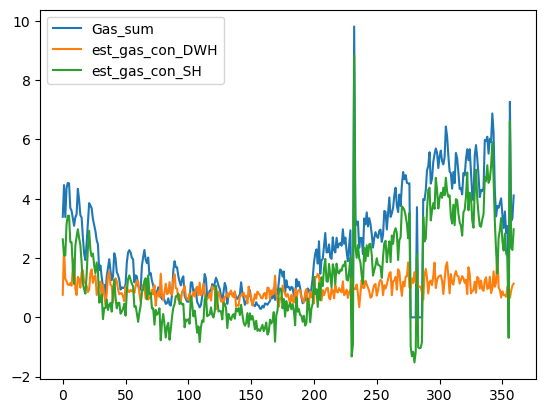

In [386]:
plt.plot(daily_stat[ 'Gas_sum'], label='Gas_sum')
plt.plot(daily_stat[ 'est_gas_con_DWH'], label='est_gas_con_DWH')
plt.plot(daily_stat[ 'est_gas_con_SH'], label='est_gas_con_SH')
plt.legend()

plt.show()

# total esrtimated gas 

In [387]:
daily_stat['estimated_gas_con']= daily_stat[ 'est_gas_con_SH']+daily_stat[ 'est_gas_con_DWH']

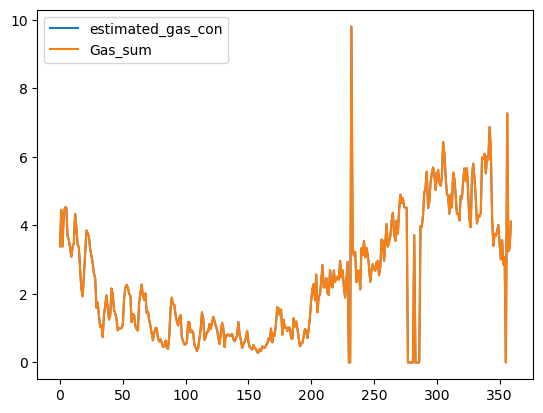

0      3.390954
1      4.457667
2      3.381333
3      4.357000
4      4.533103
         ...   
355    0.000000
356    7.268000
357    3.249333
358    3.343667
359    4.108333
Name: estimated_gas_con, Length: 360, dtype: float64

In [388]:
plt.plot(daily_stat['estimated_gas_con'], label='estimated_gas_con')
plt.plot(daily_stat[ 'Gas_sum'], label='Gas_sum')
plt.legend()

plt.show()
daily_stat['estimated_gas_con']

In [389]:
daily_stat.head()

,date,Gas_sum,ext_temp_max,ext_temp_min,ext_temp_mean,ext_hum_max,ext_hum_min,ext_hum_mean,SH_temp_max,SH_temp_min,...,DWH_hum_diff,DWH_gas_con_per_temp,DWH_gas_con_per_hum,SH_temp_diff,SH_hum_diff,est_gas_con_DWH_temp,est_gas_con_DWH_hum,est_gas_con_DWH,est_gas_con_SH,estimated_gas_con
0,2020-03-08,3.390954,10.966667,5.633333,8.673611,85.666667,55.000000,72.694444,21.042422,19.675223,...,6.314656,1.257276,0.536997,1.367199,1.367199,0.947451,0.575318,0.761384,2.629570,3.390954
1,2020-03-09,4.457667,11.333333,6.400000,8.072917,89.333333,61.333333,76.048611,21.248277,18.627593,...,31.362885,0.835708,0.142132,2.620684,2.620684,1.873779,2.857419,2.365599,2.092068,4.457667
2,2020-03-10,3.381333,12.900000,8.366667,11.388194,90.000000,58.333333,73.388889,21.172666,19.627880,...,10.348400,0.718638,0.326749,1.544786,1.544786,1.652888,0.942825,1.297856,2.083477,3.381333
3,2020-03-11,4.357000,12.000000,6.000000,8.868056,77.000000,56.333333,69.111111,21.355782,19.286411,...,13.503108,1.261843,0.322666,2.069371,2.069371,1.212962,1.230245,1.221604,3.135396,4.357000
4,2020-03-12,4.533103,9.533333,4.033333,6.532639,78.666667,52.333333,62.819444,20.789682,18.819389,...,10.101562,1.229452,0.448753,1.970293,1.970293,1.295238,0.920336,1.107787,3.425317,4.533103


#  MAE, MSE, RMSE, MAPE, and R-squared:

In [390]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [391]:

# Calculate MAE
mae = mean_absolute_error(daily_stat['Gas_sum'], daily_stat['estimated_gas_con'])
print(f'Mean Absolute Error (MAE): {mae}')



Mean Absolute Error (MAE): 1.5111368946286852e-17


In [392]:
# Calculate MSE
mse = mean_squared_error(daily_stat[ 'Gas_sum'], daily_stat['estimated_gas_con'])
print(f'Mean Squared Error (MSE): {mse}')



Mean Squared Error (MSE): 6.608079631408649e-33


In [393]:
# Calculate RMSE
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')


Root Mean Squared Error (RMSE): 8.129009553081266e-17


In [394]:

# Calculate MAPE
mape = np.mean(np.abs((daily_stat[ 'Gas_sum'] - daily_stat['estimated_gas_con']) / daily_stat[ 'Gas_sum'])) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape}')



Mean Absolute Percentage Error (MAPE): 5.007241166391373e-16


In [395]:
# Calculate R-squared
r2 = r2_score(daily_stat[ 'Gas_sum'], daily_stat['estimated_gas_con'])
print(f'R-squared (R^2): {r2}')

R-squared (R^2): 1.0


In [396]:
mean_DWH_gas_con_tem

0.3512895600951191

In [397]:
mean_DWH_gas_con_hum

0.09110830592606822

In [398]:
hourly_stat = pd.read_csv('hourly_stat.csv').dropna()
hourly_stat

,date,Gas_sum,ext_temp_max,ext_temp_min,ext_temp_mean,ext_hum_max,ext_hum_min,ext_hum_mean,SH_temp_max,SH_temp_min,SH_temp_mean,SH_hum_max,SH_hum_min,SH_hum_mean,DWH_temp_max,DWH_temp_min,DWH_temp_mean,DWH_hum_max,DWH_hum_min,DWH_hum_mean
0,2020-03-08 00:00:00,0.080621,10.100000,10.100000,10.100000,83.000000,82.666667,82.833333,21.035661,20.779522,20.907591,21.035661,20.779522,20.907591,21.527065,21.357708,21.442387,49.417708,48.271957,48.844832
1,2020-03-08 01:00:00,0.057000,10.166667,10.033333,10.100000,85.000000,84.333333,84.666667,20.570958,20.417293,20.494126,20.570958,20.417293,20.494126,21.183300,21.037000,21.110150,49.971400,49.740800,49.856100
2,2020-03-08 02:00:00,0.057333,10.200000,10.000000,10.100000,85.666667,84.000000,84.833333,20.531074,20.443435,20.487254,20.531074,20.443435,20.487254,21.039000,20.913600,20.976300,51.145600,50.464000,50.804800
3,2020-03-08 03:00:00,0.072000,10.100000,9.966667,10.033333,81.666667,79.333333,80.500000,20.416894,20.313477,20.365186,20.416894,20.313477,20.365186,20.755000,20.529783,20.642391,50.691250,50.689130,50.690190
4,2020-03-08 04:00:00,0.051333,9.733333,9.466667,9.600000,75.000000,73.000000,74.000000,20.324753,20.227799,20.276276,20.324753,20.227799,20.276276,20.629130,20.623750,20.626440,50.171875,50.127174,50.149524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8620,2021-03-02 04:00:00,0.043333,3.200000,2.900000,3.050000,79.666667,79.333333,79.500000,19.765903,19.562776,19.664339,19.765903,19.562776,19.664339,20.586957,20.469545,20.528251,48.646522,48.528409,48.587465
8621,2021-03-02 05:00:00,0.038667,2.633333,2.633333,2.633333,79.000000,79.000000,79.000000,19.492985,19.203023,19.348004,19.492985,19.203023,19.348004,20.255217,20.084783,20.170000,48.218478,48.174130,48.196304
8622,2021-03-02 06:00:00,0.149000,2.600000,2.600000,2.600000,79.333333,79.333333,79.333333,19.402020,19.202557,19.302289,19.402020,19.202557,19.302289,20.041957,18.594545,19.318251,54.542273,48.485652,51.513962
8623,2021-03-02 07:00:00,0.228667,2.633333,2.600000,2.616667,79.000000,79.000000,79.000000,19.904559,19.596427,19.750493,19.904559,19.596427,19.750493,20.751630,20.539783,20.645707,47.233043,47.171522,47.202283


In [399]:
hourly_stat['Date'] = pd.to_datetime(hourly_stat['date'])


In [400]:
hourly_stat.set_index('Date', inplace=True)

In [401]:
hourly_stat[hourly_stat['Gas_sum'] < 0] = 0

In [402]:
hourly_stat

,date,Gas_sum,ext_temp_max,ext_temp_min,ext_temp_mean,ext_hum_max,ext_hum_min,ext_hum_mean,SH_temp_max,SH_temp_min,SH_temp_mean,SH_hum_max,SH_hum_min,SH_hum_mean,DWH_temp_max,DWH_temp_min,DWH_temp_mean,DWH_hum_max,DWH_hum_min,DWH_hum_mean
Date,,,,,,,,,,,,,,,,,,,,
2020-03-08 00:00:00,2020-03-08 00:00:00,0.080621,10.100000,10.100000,10.100000,83.000000,82.666667,82.833333,21.035661,20.779522,20.907591,21.035661,20.779522,20.907591,21.527065,21.357708,21.442387,49.417708,48.271957,48.844832
2020-03-08 01:00:00,2020-03-08 01:00:00,0.057000,10.166667,10.033333,10.100000,85.000000,84.333333,84.666667,20.570958,20.417293,20.494126,20.570958,20.417293,20.494126,21.183300,21.037000,21.110150,49.971400,49.740800,49.856100
2020-03-08 02:00:00,2020-03-08 02:00:00,0.057333,10.200000,10.000000,10.100000,85.666667,84.000000,84.833333,20.531074,20.443435,20.487254,20.531074,20.443435,20.487254,21.039000,20.913600,20.976300,51.145600,50.464000,50.804800
2020-03-08 03:00:00,2020-03-08 03:00:00,0.072000,10.100000,9.966667,10.033333,81.666667,79.333333,80.500000,20.416894,20.313477,20.365186,20.416894,20.313477,20.365186,20.755000,20.529783,20.642391,50.691250,50.689130,50.690190
2020-03-08 04:00:00,2020-03-08 04:00:00,0.051333,9.733333,9.466667,9.600000,75.000000,73.000000,74.000000,20.324753,20.227799,20.276276,20.324753,20.227799,20.276276,20.629130,20.623750,20.626440,50.171875,50.127174,50.149524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-02 04:00:00,2021-03-02 04:00:00,0.043333,3.200000,2.900000,3.050000,79.666667,79.333333,79.500000,19.765903,19.562776,19.664339,19.765903,19.562776,19.664339,20.586957,20.469545,20.528251,48.646522,48.528409,48.587465
2021-03-02 05:00:00,2021-03-02 05:00:00,0.038667,2.633333,2.633333,2.633333,79.000000,79.000000,79.000000,19.492985,19.203023,19.348004,19.492985,19.203023,19.348004,20.255217,20.084783,20.170000,48.218478,48.174130,48.196304
2021-03-02 06:00:00,2021-03-02 06:00:00,0.149000,2.600000,2.600000,2.600000,79.333333,79.333333,79.333333,19.402020,19.202557,19.302289,19.402020,19.202557,19.302289,20.041957,18.594545,19.318251,54.542273,48.485652,51.513962


In [403]:
hourly_stat.dropna(inplace=True)


In [404]:
hourly_stat['DWH_temp_diff'] = hourly_stat['DWH_temp_max'] - hourly_stat['DWH_temp_min']
hourly_stat['DWH_hum_diff'] = hourly_stat['DWH_hum_max'] - hourly_stat['DWH_hum_min']


In [405]:
hourly_stat['est_gas_con_DWH_temp']= hourly_stat['DWH_temp_diff'] * mean_DWH_gas_con_tem
hourly_stat['est_gas_con_DWH_hum']= hourly_stat['DWH_hum_diff'] * mean_DWH_gas_con_hum
hourly_stat['est_gas_con_DWH']= (hourly_stat['est_gas_con_DWH_hum']+hourly_stat['est_gas_con_DWH_temp'])/2


# METHOD 1 USING GAS PER TEMP AND HUM  ESTIMATE SH GAS 

In [406]:
hourly_stat['SH_temp_diff'] = hourly_stat['SH_temp_max'] - hourly_stat['SH_temp_min']
hourly_stat['SH_hum_diff'] = hourly_stat['SH_hum_max'] - hourly_stat['SH_hum_min']


In [407]:
hourly_stat['est_gas_con_SH_temp']= hourly_stat['SH_temp_diff'] * mean_DWH_gas_con_tem
hourly_stat['est_gas_con_SH_hum']= hourly_stat['SH_hum_diff'] * mean_DWH_gas_con_hum
hourly_stat['est_gas_con_SH1']= (hourly_stat['est_gas_con_SH_hum']+hourly_stat['est_gas_con_SH_temp'])/2


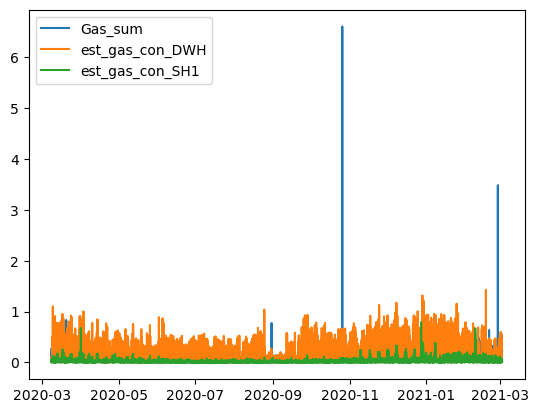

In [408]:
plt.plot(hourly_stat[ 'Gas_sum'], label='Gas_sum')
plt.plot(hourly_stat[ 'est_gas_con_DWH'], label='est_gas_con_DWH')
plt.plot(hourly_stat[ 'est_gas_con_SH1'], label='est_gas_con_SH1')
plt.legend()

plt.show()

In [409]:
hourly_stat['estimated_gas_con1']= hourly_stat[ 'est_gas_con_SH1']+hourly_stat[ 'est_gas_con_DWH']

In [431]:

# Calculate MAE
mae = mean_absolute_error(hourly_stat[ 'Gas_sum'], hourly_stat['estimated_gas_con1'])
print(f'Mean Absolute Error (MAE): {mae}')



Mean Absolute Error (MAE): 0.04223675141987926


In [430]:
# Calculate MSE
mse = mean_squared_error(hourly_stat[ 'Gas_sum'], hourly_stat['estimated_gas_con1'])
print(f'Mean Squared Error (MSE): {mse}')



Mean Squared Error (MSE): 0.012057517879921138


In [428]:
# Calculate RMSE
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')


Root Mean Squared Error (RMSE): 4.564696267359664e-18


In [429]:

# Calculate MAPE
mape = np.mean(np.abs((hourly_stat[ 'Gas_sum'] - hourly_stat['estimated_gas_con1']) / hourly_stat[ 'Gas_sum'])) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape}')



Mean Absolute Percentage Error (MAPE): 49.01230410984199


In [414]:
# Calculate R-squared
r2 = r2_score(hourly_stat[ 'Gas_sum'], hourly_stat['estimated_gas_con1'])
print(f'R-squared (R^2): {r2}')

R-squared (R^2): -1.793998631896629


# METHOD 2 GAS - DWH ESTIMATE

In [415]:
hourly_stat['est_gas_con_SH2']=hourly_stat['Gas_sum']- hourly_stat['est_gas_con_DWH']


In [416]:
hourly_stat[hourly_stat['est_gas_con_SH2'] <= 0]=0

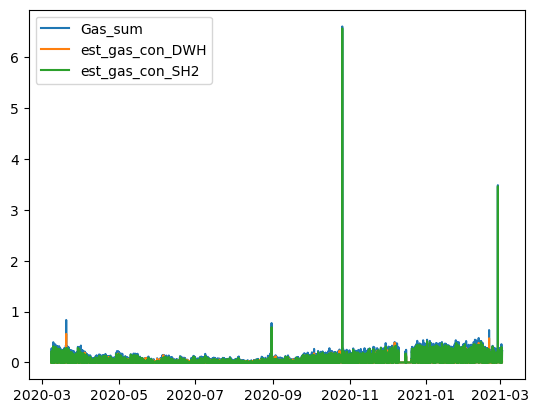

In [417]:
plt.plot(hourly_stat[ 'Gas_sum'], label='Gas_sum')
plt.plot(hourly_stat[ 'est_gas_con_DWH'], label='est_gas_con_DWH')
plt.plot(hourly_stat[ 'est_gas_con_SH2'], label='est_gas_con_SH2')
plt.legend()

plt.show()

In [418]:
hourly_stat['estimated_gas_con2']= hourly_stat[ 'est_gas_con_SH2']+hourly_stat[ 'est_gas_con_DWH']

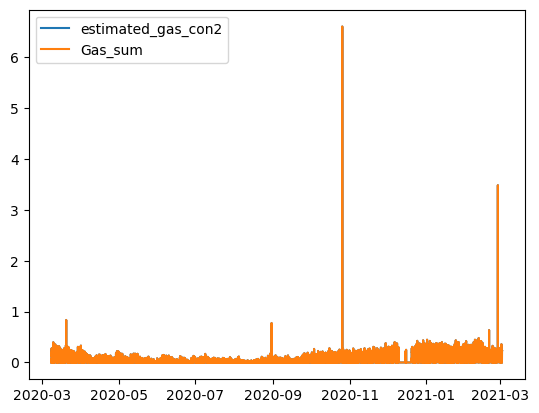

Date
2020-03-08 00:00:00    0.000000
2020-03-08 01:00:00    0.057000
2020-03-08 02:00:00    0.057333
2020-03-08 03:00:00    0.072000
2020-03-08 04:00:00    0.051333
                         ...   
2021-03-02 04:00:00    0.043333
2021-03-02 05:00:00    0.038667
2021-03-02 06:00:00    0.000000
2021-03-02 07:00:00    0.228667
2021-03-02 08:00:00    0.228000
Name: estimated_gas_con2, Length: 8600, dtype: float64

In [419]:
plt.plot(hourly_stat['estimated_gas_con2'], label='estimated_gas_con2')
plt.plot(hourly_stat[ 'Gas_sum'], label='Gas_sum')
plt.legend()

plt.show()
hourly_stat['estimated_gas_con2']

In [420]:
hourly_stat.replace([np.inf, -np.inf], np.nan, inplace=True)

In [421]:
hourly_stat.dropna(inplace=True)


In [422]:

# Calculate MAE
mae = mean_absolute_error(hourly_stat[ 'Gas_sum'], hourly_stat['estimated_gas_con2'])
print(f'Mean Absolute Error (MAE): {mae}')



Mean Absolute Error (MAE): 6.332749247475797e-19


In [423]:
# Calculate MSE
mse = mean_squared_error(hourly_stat[ 'Gas_sum'], hourly_stat['estimated_gas_con2'])
print(f'Mean Squared Error (MSE): {mse}')



Mean Squared Error (MSE): 2.0836452013247245e-35


In [424]:
# Calculate RMSE
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')


Root Mean Squared Error (RMSE): 4.564696267359664e-18


In [425]:

# Calculate MAPE
mape = np.mean(np.abs((hourly_stat[ 'Gas_sum'] - hourly_stat['estimated_gas_con2']) / hourly_stat[ 'Gas_sum'])) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape}')



Mean Absolute Percentage Error (MAPE): 6.115112714523925e-16


In [426]:
# Calculate R-squared
r2 = r2_score(hourly_stat[ 'Gas_sum'], hourly_stat['estimated_gas_con2'])
print(f'R-squared (R^2): {r2}')

R-squared (R^2): 1.0
